# 1-04 Visualising Time Series

In [70]:
import pandas as pd
pd.set_option('display.width', 76)
pd.set_option('display.max_colwidth', 10)

* You'll probably have used seaborn and matplot in Python
* However Pandas has some data viz functionality built in
* Very useful tools for time series, which we'll be exploring
* We'll also be exploring some statistical methods in analysing time series data
* As I mentioned at the beginning of the course this has a 'For Hackers' focus.
* Start by importing some data:

In [71]:
import pandas as pd
dji = pd.read_csv("../USB/Data/dji.csv", parse_dates=["Date"])
dji = dji.sort_values(by="Date", ascending=True).set_index("Date")
dji.head()

,DJI.Open,DJI.High,DJI.Low,DJI.Close,DJI.Volume,DJI.Adj.Close
Date,,,,,,
2014-01-02,16572....,16573....,16416....,16441....,809600...,16441....
2014-01-03,16456....,16518....,16439....,16469....,727700...,16469....
2014-01-06,16474....,16532....,16405....,16425....,893800...,16425....
2014-01-07,16429....,16562....,16429....,16530....,812700...,16530....
2014-01-08,16527....,16528....,16416....,16462....,103260...,16462....


* Plotting functionality in pandas is based upon matplotlib
* However we call it as a method from a dataframe
* A single column plot:

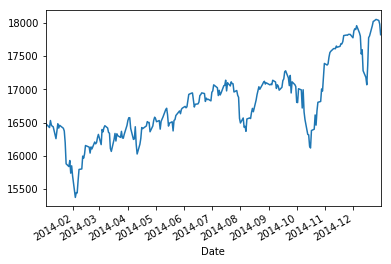

In [72]:
%matplotlib inline
dji["DJI.Close"].plot();

* Multi-column plot:

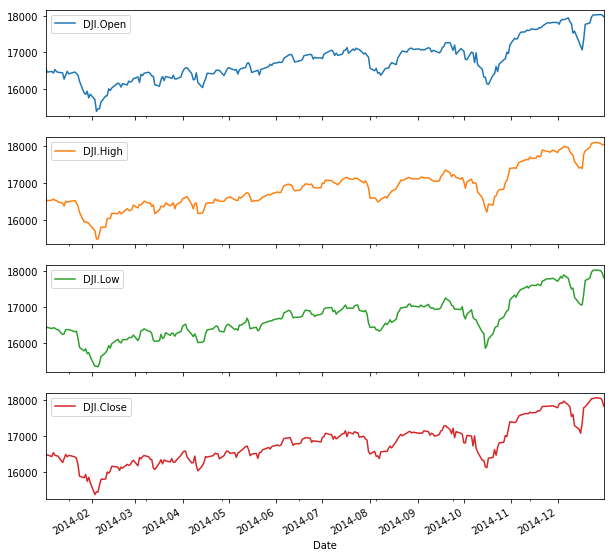

In [73]:
dji[["DJI.Open", "DJI.High", "DJI.Low", "DJI.Close"]].plot(figsize=(10,10), subplots=True);

## Time Series Decomposition

Time Series decomposition is the process of breaking the time series down into its underlying components:
* Trend: The direction in which the time series is moving over a long period of time.
    - Is the time series increasing or decreasing?
    - What rate is it increasing or decreasing?
* Seasonality: The seasonality component identifies any recurring patterns in the time series. Seasonality is usually something which we cannot influence and is sometimes removed completely.
    - Is the time series higher in the summer than in the winter?
    - Does the time series decrease at the beginning of every week?
* Residuals: The residual componenent is what's left after the Trend and Seasonality componenets have been removed.




* We'll start by looking at ways in which we can analyse the Trend    

#### Trend

* The easiest way to look at the trend is to create a rolling average
* Hopefully you remember the rolling method from the previous chapter.

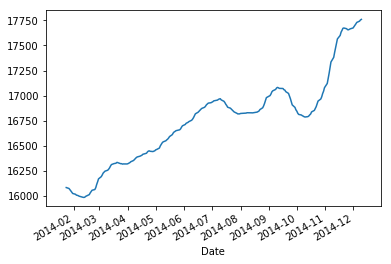

In [74]:
dji["DJI.Close"].rolling(window=30, center=True).mean().plot();

* Here we've created a rolling 20-day trend for the Dow Jones Index closing value.
* Note that the time period you choose here is important!
* Since there are no weekends in the data and the approximate working days in a month is 20, we've used a 20 day rolling window

## Exercise

1. Load in the `barclays.csv` dataset and plot the daily *Close* value (leave the values on the x-axis as is).
2. Calculate a moving average over a suitable period and add it to the plot. Is there a trend present in the time series?

*Extension* <br>
Find out how to fix the labels on the x-axis such that they don't overlap.

#### 1. Load in the `barclays.csv` dataset and plot the daily *Close* value (leave the values on the x-axis as is).

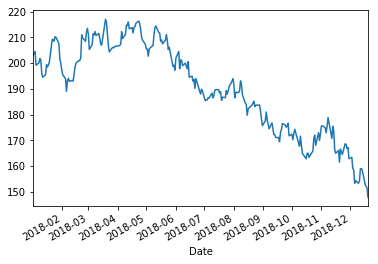

In [75]:
barclays = pd.read_csv('barclays.csv')
barclays['Date'] = pd.to_datetime(barclays['Date'])
barclays.set_index('Date', inplace=True)
barclays['Close'].plot();

#### 2. Calculate a moving average over a suitable period and add it to the plot. Is there a trend present in the time series?

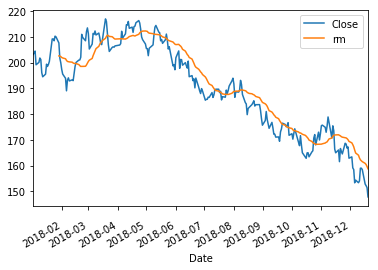

In [76]:
barclays['rm'] = barclays['Close'].rolling(20).mean()
ax = barclays[['Close','rm']].plot()
ax.tick_params(axis='x', which='major', pad=10)

Yes there is! The trend is decreasing...

## Seasonality

* Identifying the trend is relatively easy 
* Seasonality is a lot more complicated
* We'll not be looking at the nuts and bolts for extracting Seasonality componenents
* However we will be looking at how this can be implemented in Python using statsmodels

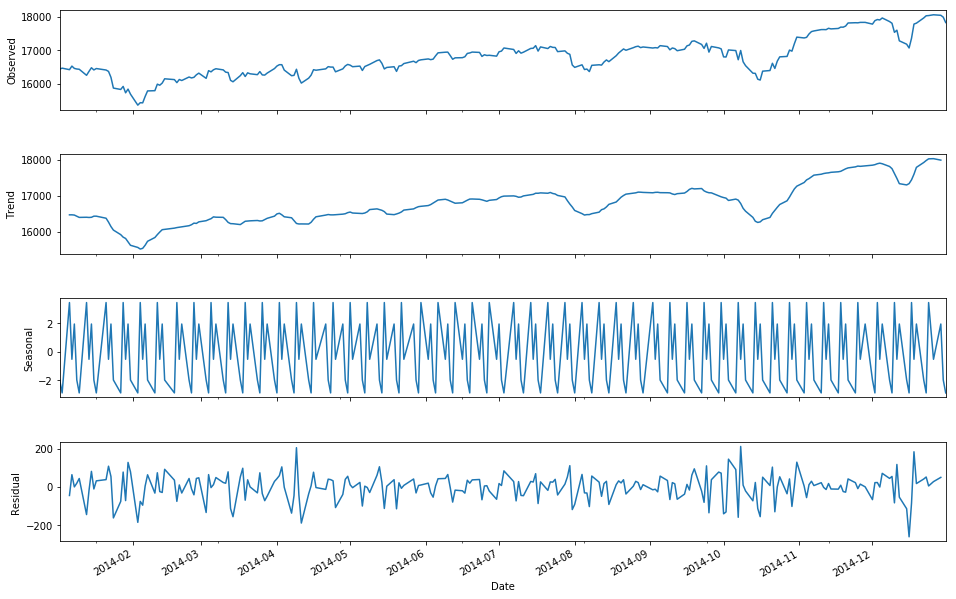

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(dji["DJI.Close"], freq=5)
fig = decomposed.plot()
fig.set_figwidth(15)
fig.set_figheight(10)

Leet's go through these...
* Observed is a basic plot of the data
* Trend is a moving average, hence why it's similar to the moving average we created in the previous chapter
* The seasonal component is estimated by simply taking the average over the detrended time series for each season. Then some additional computation is performed to ensure a seasonal value for each point in time.
* After we remove the Trend and Seasonal Components, we're left with the residuals.
* Trend + Seasonal + Residual = Observed.
* There's a sharp decrease at the end of 2014 and more randomness in October 2014. These observations may help us further down the line when we start building a forecast model.
* Note that this is a very simple or 'naive' approach to Time Series forecasting
* More sophisticated methods exist, such as STL or SEATS but these are not covered by StatsModels.
* Refer to the Forecasting: Principles and Practice Book for more detailed explanations

## Autocorrelation

* Autocorrelation quantifies any relationship between future observations and past observations.
* It can help us answer the question 'Is my time series data good enough to generate future predictions?'

In [78]:
from statsmodels.tsa.stattools import acf
acf(dji["DJI.Close"], nlags = 30)

array([1.        , 0.97083511, 0.94053691, 0.90487924, 0.86647495,
       0.82946668, 0.79295063, 0.76117492, 0.73114848, 0.70201076,
       0.68182766, 0.66381827, 0.6450658 , 0.62731064, 0.60934462,
       0.58974344, 0.56939623, 0.547497  , 0.52107729, 0.5003139 ,
       0.4774824 , 0.45535916, 0.4351798 , 0.41502874, 0.39770515,
       0.38109563, 0.36702563, 0.35103116, 0.33604838, 0.32213052,
       0.3097104 ])

In [79]:
from statsmodels.graphics.tsaplots import plot_acf

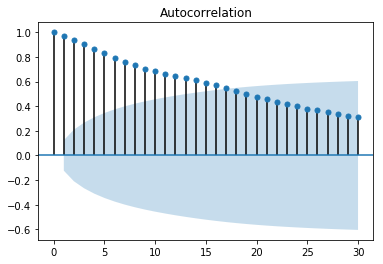

In [80]:
plot_acf(dji["DJI.Close"], lags = 30);

## An Autocorrelation Plot

* This is an Autocorrelation Plot
* It shows whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.
* Our autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1
* The horizontal axis of an autocorrelation plot shows the size of the 'lag' between the elements of the time series.
* The lag is the difference between the observed time period and the x time periods earlier.
* In this case we've selected a lag of 30 so it will show lags for 0 to 30 time periods.
* For each of the lag values it shows a spike, which represents the value of autocorrelation.
* The blue area represents the confidence interval. This defaults to 95% and can be changed by passing the alpha= keyword argument.
* For any blue dots that appear outside of the blue area, we can say with 95% certainty that they are statistically significant.
* Note that Autocorrelation can go both ways - the example here shows positive correlations, however if the spikes went downward from the axis that would represent a negative correlation.

## Interpreting our plot

* Generally speaking, the more spikes, outside of the blue area the more likely there is a correlation between the individual values of the time series.
* Here we can see a strong positive correlation and a smooth, yet decreasing line of the spikes.
* There are a significant number of spikes outside the blue area...
* So we can conclude that there is a strong relationship between the current value and the previous values and that previous values are a good predictor of future values (non withstanding freak events such as stock market crashes)
* Since this is stock market data, we would expect this.
* For a time series that is more volatile (e.g. temperature) we might not expect as strong a correlation.



* Let's apply an autocorrelation plot to the residuals

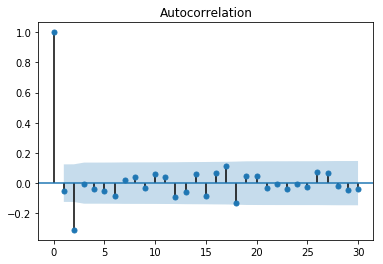

In [81]:
plot_acf(decomposed.resid.dropna(), lags = 30);

* Note when plotting decomposed data, na values are inherent in it so always use dropna to exdlude them

## Interpreting our plot

* Here we have only two spikes outside the blue area and one of those is for a lag of 0 (I.e. the value itself)
* For a residuals plot, we want the spikes to be inside the blue area, since we want to ensure that we've captured as much information in the trend as possible.
* In this case, we could conclude that we have a model that captures a good portion of the trend but it might need further tweaking or perhaps a different approach

## Exercise

1. Apply seasonal decomposition to the *Close* column from the `barclays.csv` data
2. What does the seasonal component tell you?
3. Is this a good decomposition? (Hint: Use autocorrelation)

#### 1. Apply seasonal decomposition to the *Close* column from the `barclays.csv` data

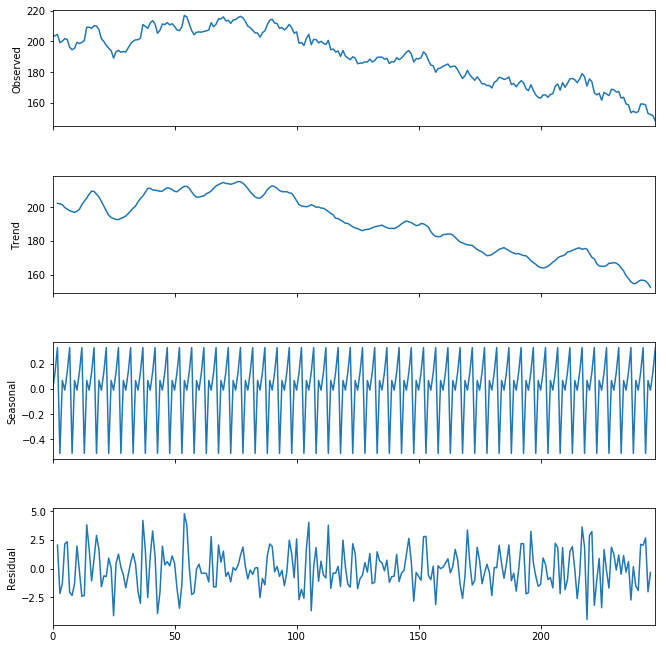

In [67]:
barclays = pd.read_csv('barclays.csv')
decomposed = seasonal_decompose(barclays['Close'], freq=5)
fig = decomposed.plot()
fig.set_figwidth(10)
fig.set_figheight(10)

#### 2. What does the seasonal component tell you?

1. There is a seasonal pattern to the data.
2. This is accounts for a very small percentage of the Observed data

#### 3. Is this a good decomposition? Hint: Check the autocorrelation for the 'close' variable and the residuals!

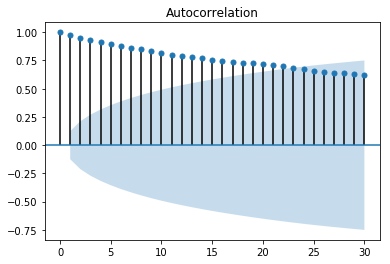

In [68]:
plot_acf(barclays['Close'], lags=30);

In [ ]:
plot_acf(barclays['Close'], lags=30);

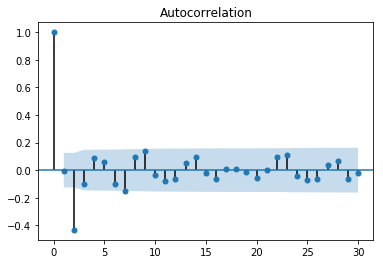

In [69]:
plot_acf(decomposed.resid.dropna(), lags=30);

* Yes, although it's not perfect. 
* There's a lot of autocorrelation in the base variable itself. This is a good sign.
* There is a tiny seasonal element to the model - this could be further explored to see if we can get more of the residuals explained by the seasonal component.
* As with the example we went through, only one of the residual lag values is statistically significant. Could this be a pattern with stock market data (e.g. Friday / Monday?)